# 17 - Understanding P-values

**P-value:** Tells us how surprising the data is if nothing is really happening.

**Key Idea:** If I flip a fair coin 10 times and get 9 heads, that's surprising. The p-value is the chance of seeing something this extreme if the coin really is fair.

**Important Notes:**
- **Small p-value (< 0.05):** Data is surprising under "no effect" → evidence something's going on
- **Large p-value:** Results fit with "no effect" → not enough evidence
- **Common myth:** P-value is NOT the chance the null is true. It's the chance of seeing the data IF the null were true.

**Remember:** P-value measures surprise, not importance!

## Simple Example: Coin Flip Test

Flip a coin 10 times, get 9 heads. Is the coin fair?

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_61446/3553930436.py:86: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


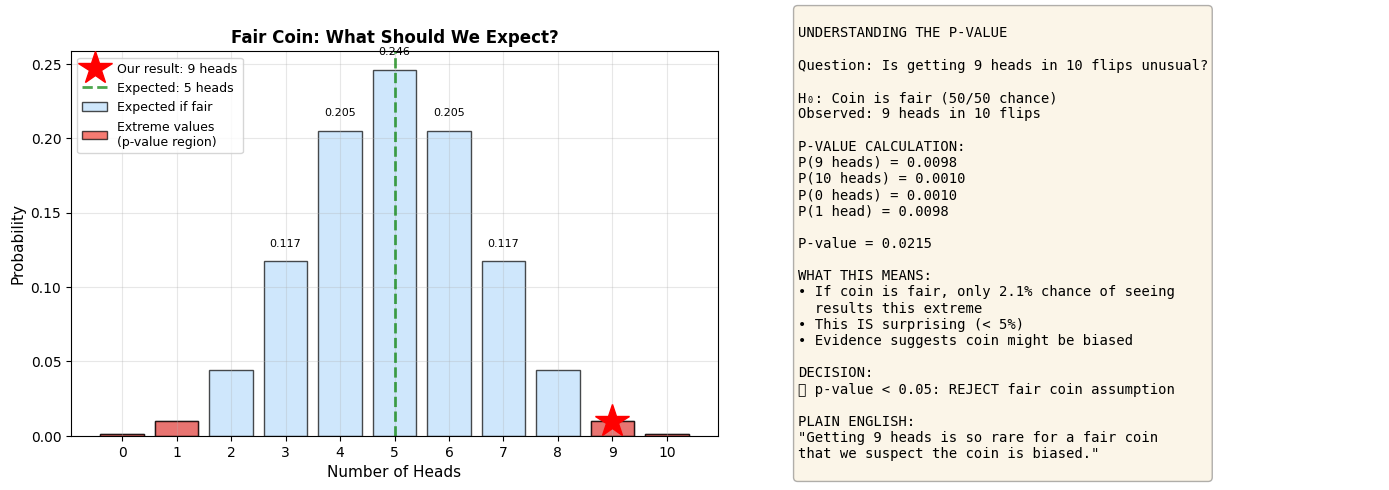


🪙 Understanding P-value: Coin Flip Example

Scenario: 10 flips, observed 9 heads
Question: Is this surprising if coin is fair?

Under fair coin (50/50):
   → Expected: 5 heads
   → Most likely: 4-6 heads (78% probability)
   → Our result: 9 heads

P-value: 0.0215 (2.15%)

What this means:
   → If coin is fair, only 2.1% chance of this extreme result
   → This is SURPRISING

✅ CONCLUSION: Evidence suggests coin is biased
   → P-value < 0.05 threshold
   → Getting 9 heads is too unlikely for a fair coin


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Scenario: 10 flips, 9 heads
n_flips = 10
observed_heads = 9
p_fair = 0.5  # Null hypothesis: coin is fair

# Under null hypothesis (fair coin), possible outcomes
x = np.arange(0, n_flips + 1)
pmf = stats.binom.pmf(x, n_flips, p_fair)

# Calculate p-value: P(X >= 9 or X <= 1) under fair coin
# Two-tailed test: extreme values on both sides
p_value = stats.binom.pmf(9, n_flips, p_fair) + stats.binom.pmf(10, n_flips, p_fair) + \
          stats.binom.pmf(0, n_flips, p_fair) + stats.binom.pmf(1, n_flips, p_fair)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Distribution under fair coin
bars = ax1.bar(x, pmf, color='#BBDEFB', alpha=0.7, edgecolor='black', label='Expected if fair')

# Highlight extreme values (9, 10 heads or 0, 1 heads)
extreme_x = [0, 1, 9, 10]
extreme_pmf = [stats.binom.pmf(i, n_flips, p_fair) for i in extreme_x]
ax1.bar(extreme_x, extreme_pmf, color='#F44336', alpha=0.7, edgecolor='black', 
       label=f'Extreme values\n(p-value region)')

# Mark observed result
ax1.plot(observed_heads, stats.binom.pmf(observed_heads, n_flips, p_fair), 
        'r*', markersize=25, label=f'Our result: {observed_heads} heads')

ax1.axvline(5, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Expected: 5 heads')
ax1.set_xlabel('Number of Heads', fontsize=11)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title('Fair Coin: What Should We Expect?', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(alpha=0.3)

# Add probability labels on bars
for i, (xi, p) in enumerate(zip(x, pmf)):
    if p > 0.05:
        ax1.text(xi, p + 0.01, f'{p:.3f}', ha='center', fontsize=8)

# P-value interpretation
ax2.axis('off')
interpretation = f"""
UNDERSTANDING THE P-VALUE

Question: Is getting 9 heads in 10 flips unusual?

H₀: Coin is fair (50/50 chance)
Observed: 9 heads in 10 flips

P-VALUE CALCULATION:
P(9 heads) = {stats.binom.pmf(9, n_flips, p_fair):.4f}
P(10 heads) = {stats.binom.pmf(10, n_flips, p_fair):.4f}
P(0 heads) = {stats.binom.pmf(0, n_flips, p_fair):.4f}
P(1 head) = {stats.binom.pmf(1, n_flips, p_fair):.4f}

P-value = {p_value:.4f}

WHAT THIS MEANS:
• If coin is fair, only {p_value:.1%} chance of seeing
  results this extreme
• This IS surprising (< 5%)
• Evidence suggests coin might be biased

DECISION:
{'✅ p-value < 0.05: REJECT fair coin assumption' if p_value < 0.05 else '❌ p-value ≥ 0.05: NOT enough evidence'}

PLAIN ENGLISH:
"Getting 9 heads is so rare for a fair coin
that we suspect the coin is biased."
"""

ax2.text(0.1, 0.5, interpretation, fontsize=10, family='monospace',
        verticalalignment='center', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("\n🪙 Understanding P-value: Coin Flip Example")
print(f"\nScenario: 10 flips, observed {observed_heads} heads")
print(f"Question: Is this surprising if coin is fair?")

print(f"\nUnder fair coin (50/50):")
print(f"   → Expected: 5 heads")
print(f"   → Most likely: 4-6 heads (78% probability)")
print(f"   → Our result: {observed_heads} heads")

print(f"\nP-value: {p_value:.4f} ({p_value:.2%})")
print(f"\nWhat this means:")
print(f"   → If coin is fair, only {p_value:.1%} chance of this extreme result")
print(f"   → This is {'SURPRISING' if p_value < 0.05 else 'NOT THAT SURPRISING'}")

if p_value < 0.05:
    print(f"\n✅ CONCLUSION: Evidence suggests coin is biased")
    print(f"   → P-value < 0.05 threshold")
    print(f"   → Getting 9 heads is too unlikely for a fair coin")
else:
    print(f"\n❌ CONCLUSION: Not enough evidence coin is biased")
    print(f"   → P-value ≥ 0.05 threshold")
    print(f"   → Could happen by chance with fair coin")

## Real-World Example: New Ad Campaign

Company launches new ad. Sales increase from 100 to 115 per week. Is the lift real or just luck?

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_61446/1770354427.py:128: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()


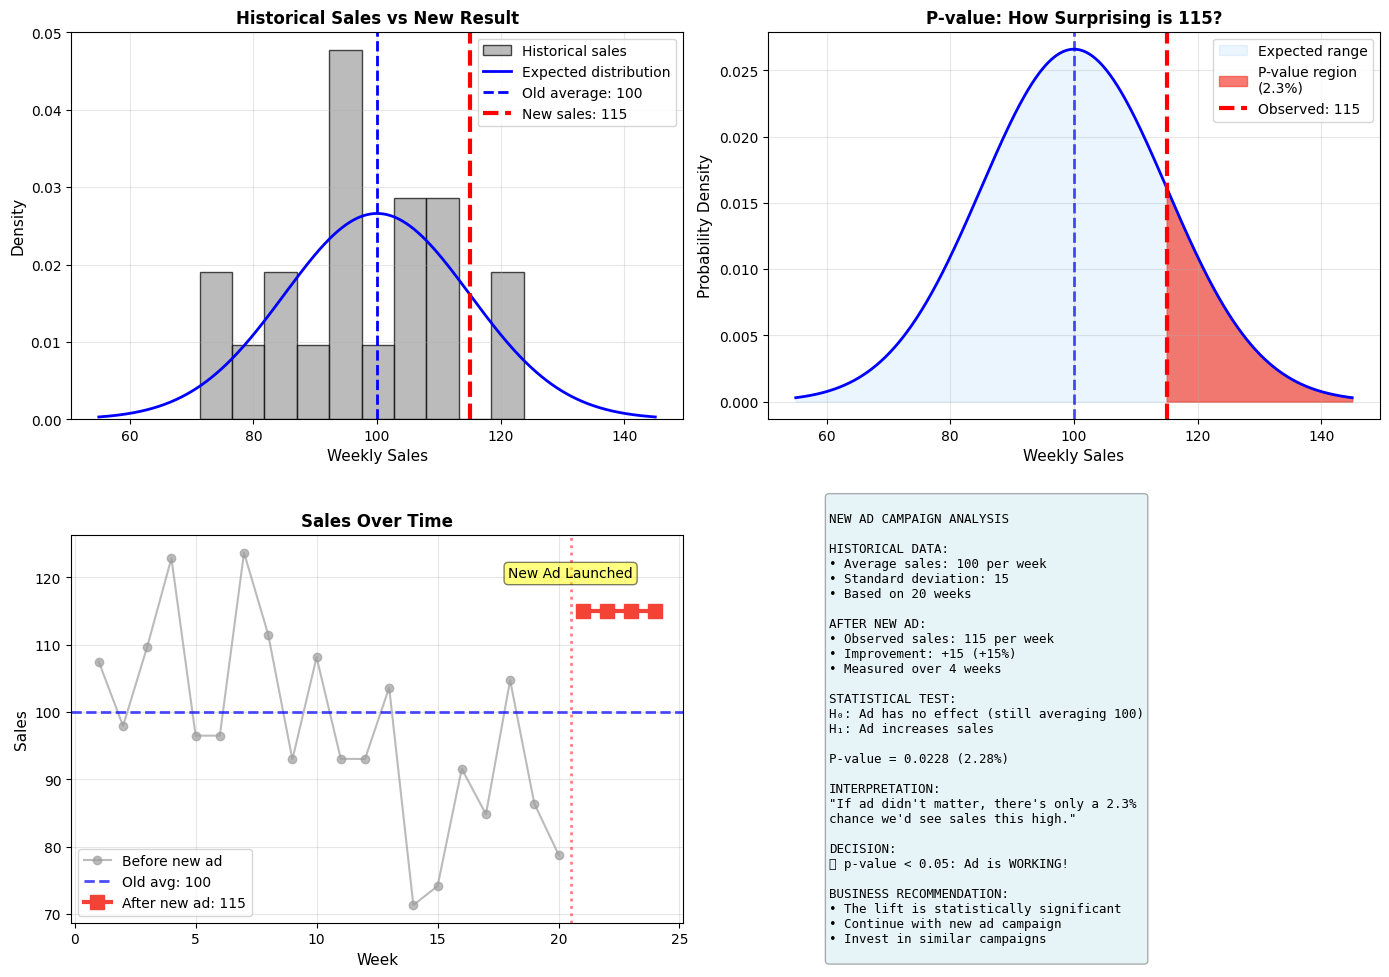


📊 Understanding P-value: Ad Campaign Example

Scenario: New ad campaign launched

Historical performance (before ad):
   → Average: 100 sales/week
   → Typical range: 85 to 115
   → Based on 20 weeks of data

New performance (after ad):
   → Observed: 115 sales/week
   → Improvement: +15 sales (+15%)

P-value: 0.0228 (2.28%)

What this means:
   → If ad didn't matter, only 2.3% chance of seeing 115 sales
   → This is SURPRISING

✅ CONCLUSION: Ad is working!
   → P-value < 0.05 (statistically significant)
   → Lift in sales very unlikely to be luck
   → Recommend: Continue using new ad

💡 Key insight:
   P-value tells us how SURPRISING the result is,
   NOT how IMPORTANT it is. Always consider business impact too!


In [2]:
# Historical sales data (before new ad)
np.random.seed(42)
historical_mean = 100
historical_sd = 15
weeks_before = 20

# Observed data after new ad
observed_sales = 115
weeks_after = 4

# Calculate p-value: How likely is 115 if true mean is still 100?
# Use one-sample z-test logic
z_score = (observed_sales - historical_mean) / (historical_sd / np.sqrt(weeks_after))
p_value_ad = 1 - stats.norm.cdf(z_score)  # One-tailed: sales increased

# Generate historical sales for visualization
historical_sales = np.random.normal(historical_mean, historical_sd, weeks_before)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Historical sales distribution
ax1 = axes[0, 0]
ax1.hist(historical_sales, bins=10, density=True, alpha=0.7, 
        color='#9E9E9E', edgecolor='black', label='Historical sales')

# Overlay normal distribution
x_sales = np.linspace(historical_mean - 3*historical_sd, historical_mean + 3*historical_sd, 1000)
pdf_sales = stats.norm.pdf(x_sales, historical_mean, historical_sd)
ax1.plot(x_sales, pdf_sales, 'b-', linewidth=2, label='Expected distribution')

ax1.axvline(historical_mean, color='blue', linestyle='--', linewidth=2, 
           label=f'Old average: {historical_mean}')
ax1.axvline(observed_sales, color='red', linestyle='--', linewidth=3, 
           label=f'New sales: {observed_sales}')

ax1.set_xlabel('Weekly Sales', fontsize=11)
ax1.set_ylabel('Density', fontsize=11)
ax1.set_title('Historical Sales vs New Result', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# P-value visualization
ax2 = axes[0, 1]
ax2.plot(x_sales, pdf_sales, 'b-', linewidth=2)
ax2.fill_between(x_sales, pdf_sales, alpha=0.3, color='#BBDEFB', label='Expected range')

# Highlight p-value region (area above observed)
x_extreme = x_sales[x_sales >= observed_sales]
pdf_extreme = stats.norm.pdf(x_extreme, historical_mean, historical_sd)
ax2.fill_between(x_extreme, pdf_extreme, alpha=0.7, color='#F44336', 
                label=f'P-value region\n({p_value_ad:.1%})')

ax2.axvline(observed_sales, color='red', linestyle='--', linewidth=3, 
           label=f'Observed: {observed_sales}')
ax2.axvline(historical_mean, color='blue', linestyle='--', linewidth=2, alpha=0.7)

ax2.set_xlabel('Weekly Sales', fontsize=11)
ax2.set_ylabel('Probability Density', fontsize=11)
ax2.set_title('P-value: How Surprising is 115?', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Time series view
ax3 = axes[1, 0]
weeks_hist = np.arange(1, weeks_before + 1)
weeks_new = np.arange(weeks_before + 1, weeks_before + weeks_after + 1)

ax3.plot(weeks_hist, historical_sales, 'o-', color='#9E9E9E', 
        alpha=0.7, label='Before new ad', markersize=6)
ax3.axhline(historical_mean, color='blue', linestyle='--', linewidth=2, 
           alpha=0.7, label=f'Old avg: {historical_mean}')
ax3.plot(weeks_new, [observed_sales]*weeks_after, 's-', color='#F44336', 
        markersize=10, linewidth=3, label=f'After new ad: {observed_sales}')

ax3.axvline(weeks_before + 0.5, color='red', linestyle=':', linewidth=2, alpha=0.5)
ax3.text(weeks_before + 0.5, ax3.get_ylim()[1] * 0.95, 'New Ad Launched', 
        ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

ax3.set_xlabel('Week', fontsize=11)
ax3.set_ylabel('Sales', fontsize=11)
ax3.set_title('Sales Over Time', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Decision summary
ax4 = axes[1, 1]
ax4.axis('off')

decision_text = f"""
NEW AD CAMPAIGN ANALYSIS

HISTORICAL DATA:
• Average sales: {historical_mean} per week
• Standard deviation: {historical_sd}
• Based on {weeks_before} weeks

AFTER NEW AD:
• Observed sales: {observed_sales} per week
• Improvement: +{observed_sales - historical_mean} (+{(observed_sales/historical_mean - 1)*100:.0f}%)
• Measured over {weeks_after} weeks

STATISTICAL TEST:
H₀: Ad has no effect (still averaging {historical_mean})
H₁: Ad increases sales

P-value = {p_value_ad:.4f} ({p_value_ad:.2%})

INTERPRETATION:
"If ad didn't matter, there's only a {p_value_ad:.1%}
chance we'd see sales this high."

DECISION:
{'✅ p-value < 0.05: Ad is WORKING!' if p_value_ad < 0.05 else '⚠️ p-value ≥ 0.05: Need more data'}

BUSINESS RECOMMENDATION:
{'• The lift is statistically significant' if p_value_ad < 0.05 else '• Results inconclusive'}
{'• Continue with new ad campaign' if p_value_ad < 0.05 else '• Run test longer before deciding'}
{'• Invest in similar campaigns' if p_value_ad < 0.05 else '• Current evidence not strong enough'}
"""

ax4.text(0.1, 0.5, decision_text, fontsize=9, family='monospace',
        verticalalignment='center', 
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("\n📊 Understanding P-value: Ad Campaign Example")
print(f"\nScenario: New ad campaign launched")

print(f"\nHistorical performance (before ad):")
print(f"   → Average: {historical_mean} sales/week")
print(f"   → Typical range: {historical_mean - historical_sd:.0f} to {historical_mean + historical_sd:.0f}")
print(f"   → Based on {weeks_before} weeks of data")

print(f"\nNew performance (after ad):")
print(f"   → Observed: {observed_sales} sales/week")
print(f"   → Improvement: +{observed_sales - historical_mean} sales (+{(observed_sales/historical_mean - 1)*100:.0f}%)")

print(f"\nP-value: {p_value_ad:.4f} ({p_value_ad:.2%})")
print(f"\nWhat this means:")
print(f"   → If ad didn't matter, only {p_value_ad:.1%} chance of seeing {observed_sales} sales")
print(f"   → This is {'VERY SURPRISING' if p_value_ad < 0.01 else 'SURPRISING' if p_value_ad < 0.05 else 'NOT THAT SURPRISING'}")

if p_value_ad < 0.05:
    print(f"\n✅ CONCLUSION: Ad is working!")
    print(f"   → P-value < 0.05 (statistically significant)")
    print(f"   → Lift in sales very unlikely to be luck")
    print(f"   → Recommend: Continue using new ad")
else:
    print(f"\n⚠️ CONCLUSION: Not enough evidence yet")
    print(f"   → P-value ≥ 0.05 (not statistically significant)")
    print(f"   → Could be luck, need more data")
    print(f"   → Recommend: Run test longer")

print(f"\n💡 Key insight:")
print(f"   P-value tells us how SURPRISING the result is,")
print(f"   NOT how IMPORTANT it is. Always consider business impact too!")

## Summary: Understanding P-values

### What is a P-value?
The probability of seeing data this extreme **IF the null hypothesis is true**.

### Common Misunderstandings ❌
- **WRONG:** "P-value is the chance the null hypothesis is true"
- **WRONG:** "P-value tells us how important the result is"
- **WRONG:** "P-value = 0.049 is way different from 0.051"

### Correct Interpretation ✅
- **RIGHT:** "If nothing was happening, this data would only occur X% of the time"
- **RIGHT:** "P-value measures surprise, not importance"
- **RIGHT:** "P-value is a continuum, not a binary yes/no"

### Decision Rules
- **p < 0.05:** Result is "statistically significant" → Evidence against null
- **p ≥ 0.05:** Result is "not significant" → Insufficient evidence
- **p < 0.01:** Very strong evidence
- **p > 0.10:** Weak or no evidence

### Real-World Application
**Coin example:** P-value = 0.02 means "Only 2% chance of 9 heads if coin is fair"

**Ad example:** P-value = 0.04 means "If ad didn't work, only 4% chance of this sales increase"

### Important Caveats
1. **Statistical ≠ Practical:** Small p-value doesn't mean big impact
2. **Context matters:** Always interpret alongside effect size
3. **Sample size effect:** Huge samples make tiny effects significant
4. **Multiple testing:** Running many tests inflates false positives

### The Bottom Line
**P-value answers:** "How surprising is this IF nothing is happening?"

**P-value does NOT answer:** "Is this important?" or "Is the null true?"

**Always ask:** "Is this statistically significant AND practically meaningful?"